In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm
import itertools
from matplotlib import gridspec
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydot
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import binarize
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
import matplotlib.mlab as mlab
import seaborn
%matplotlib inline
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import IsolationForest


KNN

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/creditcard.csv")
data = data[~np.isnan(data).any(axis=1)]
print(data)

            Time         V1         V2  ...       V28  Amount  Class
0            0.0  -1.359807  -0.072781  ... -0.021053  149.62      0
1            0.0   1.191857   0.266151  ...  0.014724    2.69      0
2            1.0  -1.358354  -1.340163  ... -0.059752  378.66      0
3            1.0  -0.966272  -0.185226  ...  0.061458  123.50      0
4            2.0  -1.158233   0.877737  ...  0.215153   69.99      0
...          ...        ...        ...  ...       ...     ...    ...
284802  172786.0 -11.881118  10.071785  ...  0.823731    0.77      0
284803  172787.0  -0.732789  -0.055080  ... -0.053527   24.79      0
284804  172788.0   1.919565  -0.301254  ... -0.026561   67.88      0
284805  172788.0  -0.240440   0.530483  ...  0.104533   10.00      0
284806  172792.0  -0.533413  -0.189733  ...  0.013649  217.00      0

[284807 rows x 31 columns]


In [ ]:

X = data[["V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27","V28","Amount"]]
y = data["Class"]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
print("train and test sets created")


train and test sets created


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5,n_jobs=16)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("classifier created")
score = knn.score(X_test,y_test)
print("model evaluated")
print(score)

classifier created
model evaluated
0.9993539507317211


SVM



In [ ]:
df = pd.DataFrame(data) 

In [ ]:
df.describe()

Time            V1  ...         Amount          Class
count  284807.000000  2.848070e+05  ...  284807.000000  284807.000000
mean    94813.859575  3.919560e-15  ...      88.349619       0.001727
std     47488.145955  1.958696e+00  ...     250.120109       0.041527
min         0.000000 -5.640751e+01  ...       0.000000       0.000000
25%     54201.500000 -9.203734e-01  ...       5.600000       0.000000
50%     84692.000000  1.810880e-02  ...      22.000000       0.000000
75%    139320.500000  1.315642e+00  ...      77.165000       0.000000
max    172792.000000  2.454930e+00  ...   25691.160000       1.000000

[8 rows x 31 columns]

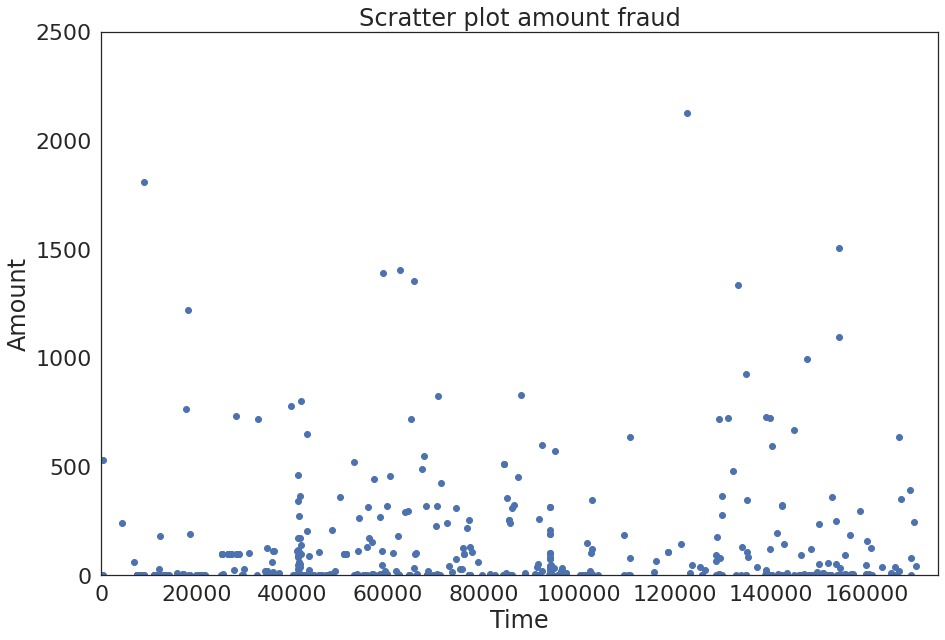

In [ ]:
df_fraud = df[df['Class'] == 1] # Recovery of fraud data
plt.figure(figsize=(15,10))
plt.scatter(df_fraud['Time'], df_fraud['Amount']) # Display fraud amounts according to their time
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()


In [ ]:
nb_big_fraud = df_fraud[df_fraud['Amount'] > 1000].shape[0] # Recovery of frauds over 1000
print('There are only '+ str(nb_big_fraud) + ' frauds where the amount was bigger than 1000 over ' + str(df_fraud.shape[0]) + ' frauds')

There are only 9 frauds where the amount was bigger than 1000 over 492 frauds


In [ ]:
number_fraud = len(data[data.Class == 1])
number_no_fraud = len(data[data.Class == 0])
print('There are only '+ str(number_fraud) + ' frauds in the original dataset, even though there are ' + str(number_no_fraud) +' no frauds in the dataset.')


There are only 492 frauds in the original dataset, even though there are 284315 no frauds in the dataset.


In [ ]:
print("The accuracy of the classifier then would be : "+ str((284315-492)/284315)+ " which is the number of good classification over the number of tuple to classify")

The accuracy of the classifier then would be : 0.998269524998681 which is the number of good classification over the number of tuple to classify


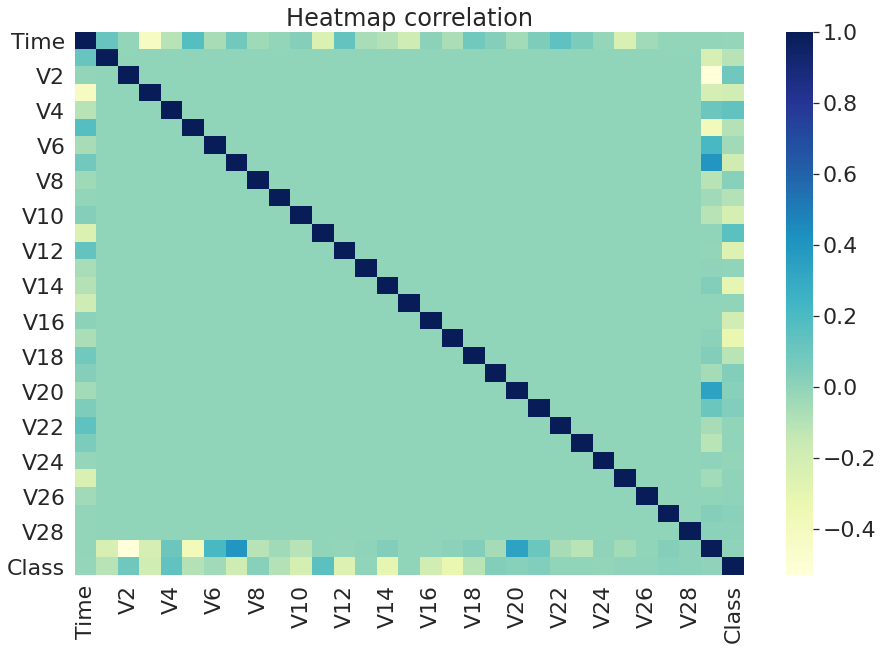

In [ ]:
df_corr = df.corr() # Calculation of the correlation coefficients in pairs, with the default method:
                    # Pearson, Standard Correlation Coefficient
plt.figure(figsize=(15,10))
seaborn.heatmap(df_corr, cmap="YlGnBu") # Displaying the Heatmap
seaborn.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

In [ ]:
rank = df_corr['Class'] # Retrieving the correlation coefficients per feature in relation to the feature class
df_rank = pd.DataFrame(rank) 
df_rank = np.abs(df_rank).sort_values(by='Class',ascending=False) # Ranking the absolute values of the coefficients
                                                                  # in descending order
df_rank.dropna(inplace=True) # Removing Missing Data (not a number)

In [ ]:
df_train_all = df[0:150000] # We cut in two the original dataset
df_train_1 = df_train_all[df_train_all['Class'] == 1] # We seperate the data which are the frauds and the no frauds
df_train_0 = df_train_all[df_train_all['Class'] == 0]
print('In this dataset, we have ' + str(len(df_train_1)) +" frauds so we need to take a similar number of non-fraud")

df_sample=df_train_0.sample(300)
df_train = df_train_1.append(df_sample) # We gather the frauds with the no frauds. 
df_train = df_train.sample(frac=1) # Then we mix our dataset

In this dataset, we have 293 frauds so we need to take a similar number of non-fraud


In [ ]:
X_train = df_train.drop(['Time', 'Class'],axis=1) # We drop the features Time (useless), and the Class (label)
y_train = df_train['Class'] # We create our label
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [ ]:
df_test_all = df[150000:]
X_test_all = df_test_all.drop(['Time', 'Class'],axis=1)
y_test_all = df_test_all['Class']
X_test_all = np.asarray(X_test_all)
y_test_all = np.asarray(y_test_all)

In [ ]:
X_train_rank = df_train[df_rank.index[1:11]] # We take the first ten ranked features
X_train_rank = np.asarray(X_train_rank)
############################## with all the test dataset to see if the model learn correctly ##################
X_test_all_rank = df_test_all[df_rank.index[1:11]]
X_test_all_rank = np.asarray(X_test_all_rank)
y_test_all = np.asarray(y_test_all)

In [ ]:
class_names=np.array(['0','1']) # Binary label, Class = 1 (fraud) and Class = 0 (no fraud)


In [ ]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
classifier = svm.SVC(kernel='linear') # We set a SVM classifier, the default SVM Classifier (Kernel = Radial Basis Function)
classifier1 = svm.SVC(kernel='rbf')
classifier.fit(X_train, y_train)
classifier1.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

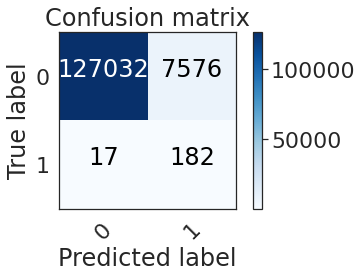

In [ ]:
prediction_SVM_all = classifier.predict(X_test_all) #And finally, we predict our data test.
prediction_SVM_all1 = classifier1.predict(X_test_all)
cm = confusion_matrix(y_test_all, prediction_SVM_all)
plot_confusion_matrix(cm,class_names)

In [ ]:
print('Our criterion give a result of ' 
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))

Our criterion give a result of 0.9203932977996871


In [ ]:
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

We have detected 182 frauds / 199 total frauds.

So, the probability to detect a fraud is 0.914572864321608
the accuracy is : 0.9436750317120031


In [ ]:
classifier_b = svm.SVC(kernel='linear',class_weight={0:0.60, 1:0.40})
classifier_b.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight={0: 0.6, 1: 0.4},
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

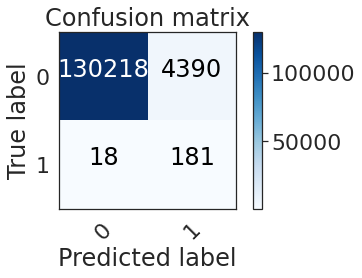

In [ ]:


prediction_SVM_b_all = classifier_b.predict(X_test_all) #We predict all the data set.
cm = confusion_matrix(y_test_all, prediction_SVM_b_all)
plot_confusion_matrix(cm,class_names)

In [ ]:
print('Our criterion give a result of ' 
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))

Our criterion give a result of 0.921098471207283


In [ ]:
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

We have detected 181 frauds / 199 total frauds.

So, the probability to detect a fraud is 0.9095477386934674
the accuracy is : 0.9673014012625457


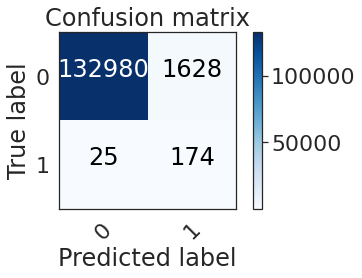

In [ ]:



classifier_b.fit(X_train_rank, y_train) # Then we train our model, with our balanced data train.
prediction_SVM = classifier_b.predict(X_test_all_rank) #And finally, we predict our data test.
cm = confusion_matrix(y_test_all, prediction_SVM)
plot_confusion_matrix(cm,class_names)

In [ ]:
print('Our criterion give a result of ' 
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))

Our criterion give a result of 0.8970450925318769


In [ ]:
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

We have detected 174 frauds / 199 total frauds.

So, the probability to detect a fraud is 0.8743718592964824
the accuracy is : 0.9877380254734547


RANDOM FOREST!!

In [ ]:
print(data.columns)
data.head()

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


Time        V1        V2        V3  ...       V27       V28  Amount  Class
0   0.0 -1.359807 -0.072781  2.536347  ...  0.133558 -0.021053  149.62      0
1   0.0  1.191857  0.266151  0.166480  ... -0.008983  0.014724    2.69      0
2   1.0 -1.358354 -1.340163  1.773209  ... -0.055353 -0.059752  378.66      0
3   1.0 -0.966272 -0.185226  1.792993  ...  0.062723  0.061458  123.50      0
4   2.0 -1.158233  0.877737  1.548718  ...  0.219422  0.215153   69.99      0

[5 rows x 31 columns]

In [ ]:

print(data.shape)
print(data.describe())

(284807, 31)
                Time            V1  ...         Amount          Class
count  284807.000000  2.848070e+05  ...  284807.000000  284807.000000
mean    94813.859575  3.919560e-15  ...      88.349619       0.001727
std     47488.145955  1.958696e+00  ...     250.120109       0.041527
min         0.000000 -5.640751e+01  ...       0.000000       0.000000
25%     54201.500000 -9.203734e-01  ...       5.600000       0.000000
50%     84692.000000  1.810880e-02  ...      22.000000       0.000000
75%    139320.500000  1.315642e+00  ...      77.165000       0.000000
max    172792.000000  2.454930e+00  ...   25691.160000       1.000000

[8 rows x 31 columns]


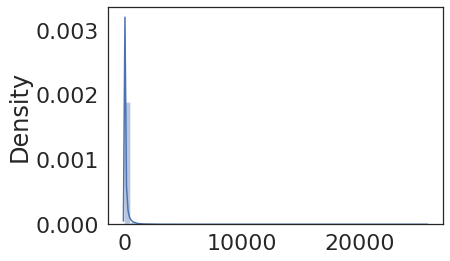

In [ ]:





amount = [data['Amount'].values]
sns.distplot(amount)

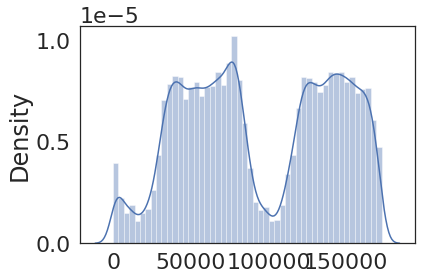

In [ ]:
# distribution of Time
time = data['Time'].values
sns.distplot(time)

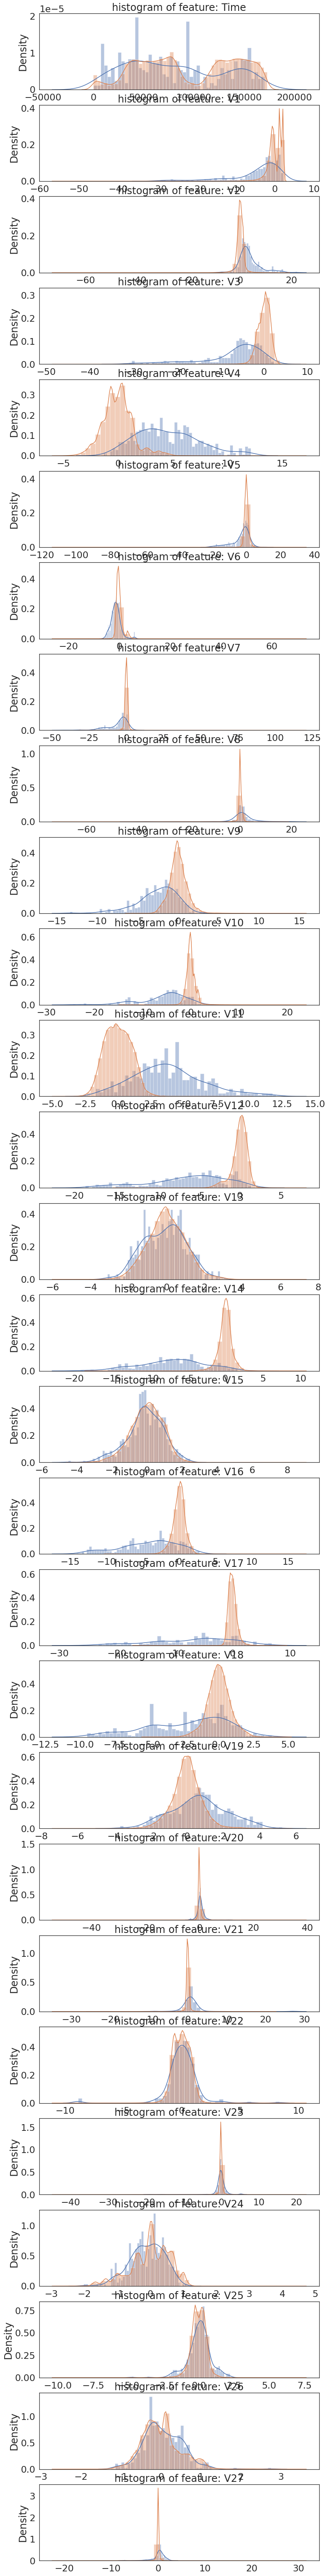

In [ ]:


# distribution of anomalous features
features = data.iloc[:,0:28].columns

plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, c in enumerate(data[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(data[c][data.Class == 1], bins=50)
    sns.distplot(data[c][data.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(c))
plt.show()

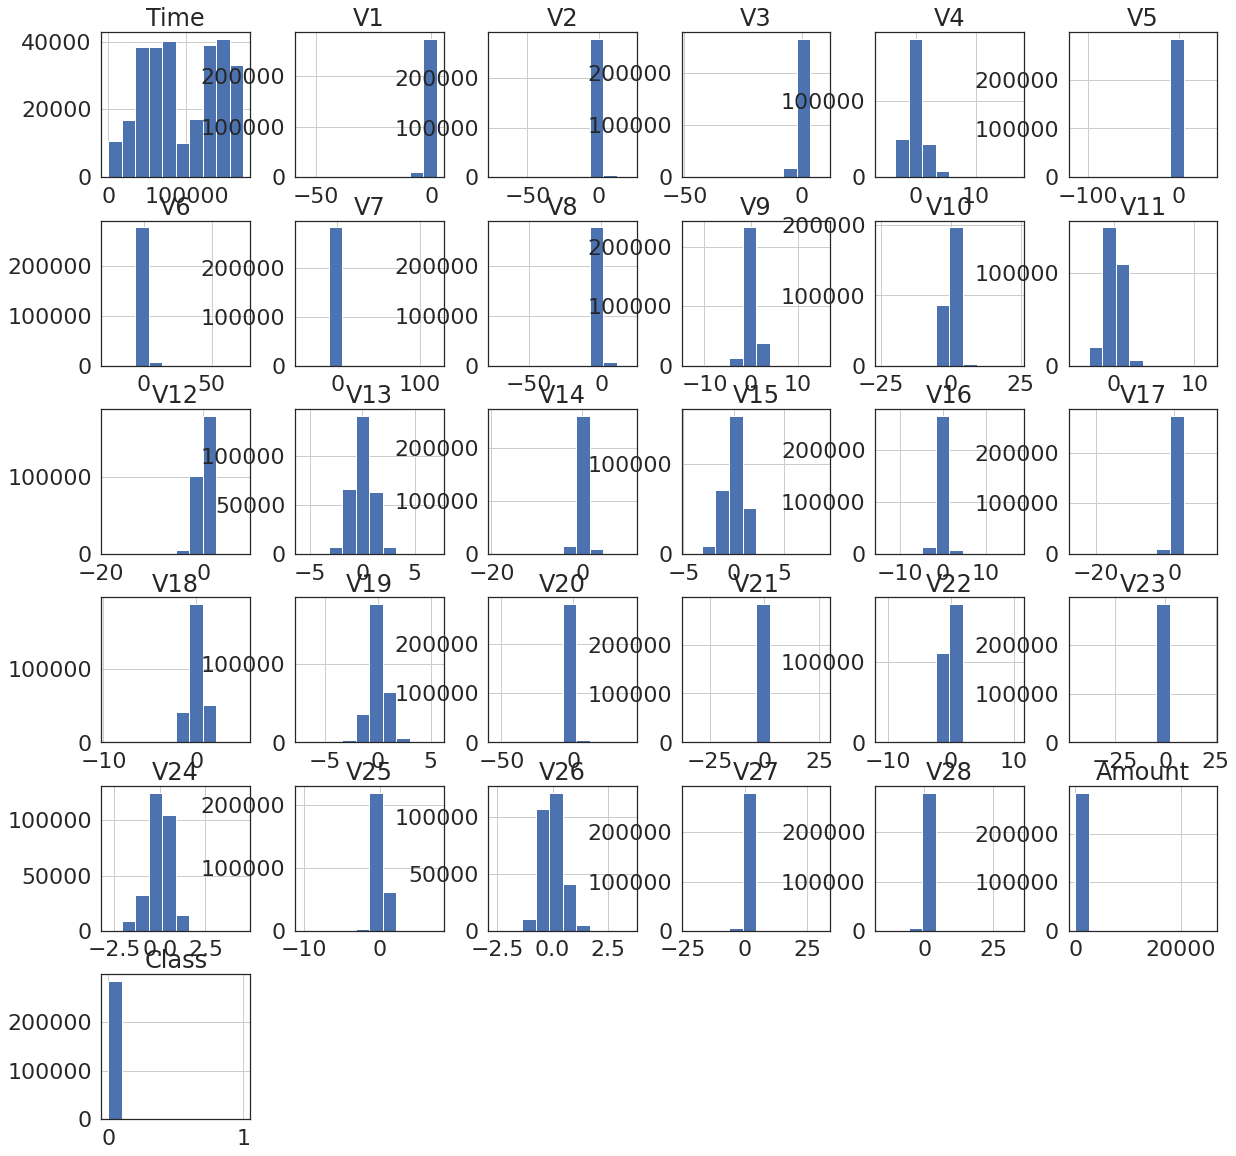

In [ ]:
data.hist(figsize = (20, 20))
plt.show()

In [ ]:


Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]
outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


In [ ]:
print("Amount details of fradulent transacation")
Fraud.Amount.describe()


Amount details of fradulent transacation


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
print("Amount details of valid transaction")
Valid.Amount.describe()

Amount details of valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

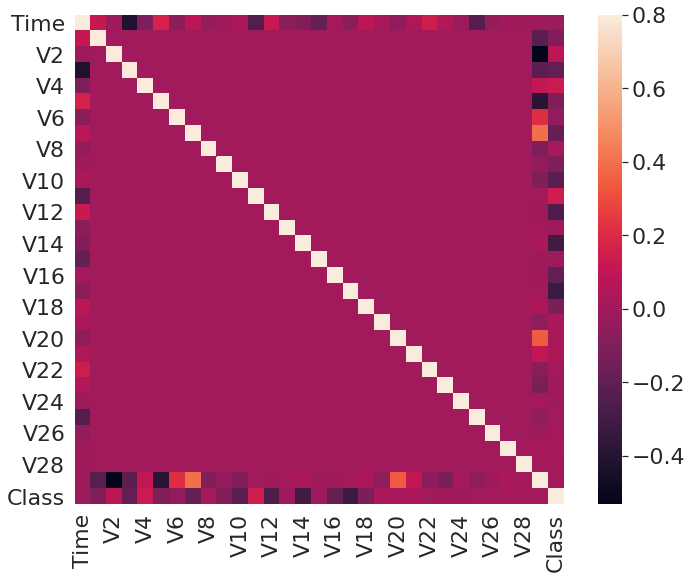

In [ ]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [ ]:
X=data.drop(['Class'], axis=1)
Y=data["Class"]
print(X.shape)
print(Y.shape)
#getting just the values for the sake of processing (its a numpy array with no columns)
X_data=X.values
Y_data=Y.values

(284807, 30)
(284807,)


In [ ]:


X_data

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 1.72788000e+05,  1.91956501e+00, -3.01253846e-01, ...,
         4.45477214e-03, -2.65608286e-02,  6.78800000e+01],
       [ 1.72788000e+05, -2.40440050e-01,  5.30482513e-01, ...,
         1.08820735e-01,  1.04532821e-01,  1.00000000e+01],
       [ 1.72792000e+05, -5.33412522e-01, -1.89733337e-01, ...,
        -2.41530880e-03,  1.36489143e-02,  2.17000000e+02]])

In [ ]:


X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.2, random_state = 42)

In [ ]:
ifc=IsolationForest(max_samples=len(X_train),
                    contamination=outlier_fraction,random_state=1)
ifc.fit(X_train)
scores_pred = ifc.decision_function(X_train)
y_pred1 = ifc.predict(X_test)
# Reshape the prediction values to 0 for valid, 1 for fraud. 
y_pred1[y_pred1 == 1] = 0
y_pred1[y_pred1 == -1] = 1
n_errors = (y_pred1 != Y_test).sum()

the Model used is Isolation Forest
The accuracy is  0.9978933323970366
The precision is 0.375
The recall is 0.336734693877551
The F1-Score is 0.3548387096774193
The Matthews correlation coefficient is0.3543008067850027


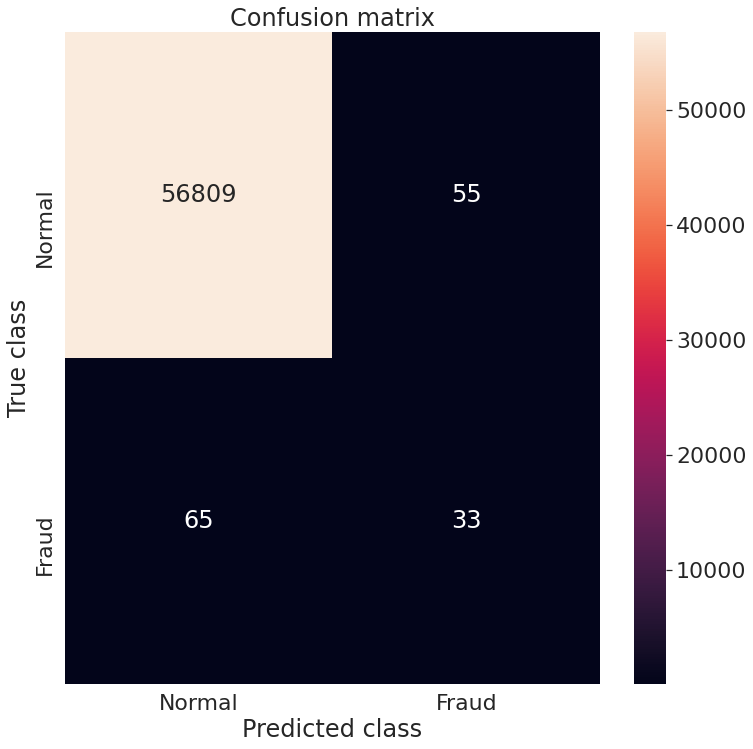

Isolation Forest: 120
0.9978933323970366
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.38      0.34      0.35        98

    accuracy                           1.00     56962
   macro avg       0.69      0.67      0.68     56962
weighted avg       1.00      1.00      1.00     56962



<Figure size 648x504 with 0 Axes>

In [ ]:
n_outliers = len(Fraud)
print("the Model used is {}".format("Isolation Forest"))
acc= accuracy_score(Y_test,y_pred1)
print("The accuracy is  {}".format(acc))
prec= precision_score(Y_test,y_pred1)
print("The precision is {}".format(prec))
rec= recall_score(Y_test,y_pred1)
print("The recall is {}".format(rec))
f1= f1_score(Y_test,y_pred1)
print("The F1-Score is {}".format(f1))
MCC=matthews_corrcoef(Y_test,y_pred1)
print("The Matthews correlation coefficient is{}".format(MCC))
#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test, y_pred1)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS,
            yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
# Run classification metrics
plt.figure(figsize=(9, 7))
print('{}: {}'.format("Isolation Forest", n_errors))
print(accuracy_score(Y_test, y_pred1))
print(classification_report(Y_test, y_pred1))

**Random Forest**

In [ ]:

# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)
# predictions
y_pred2 = rfc.predict(X_test)

The model used is Random Forest classifier
The accuracy is  0.9995962220427653
The precision is 0.987012987012987
The recall is 0.7755102040816326
The F1-Score is 0.8685714285714285
The Matthews correlation coefficient is 0.8747121626683524


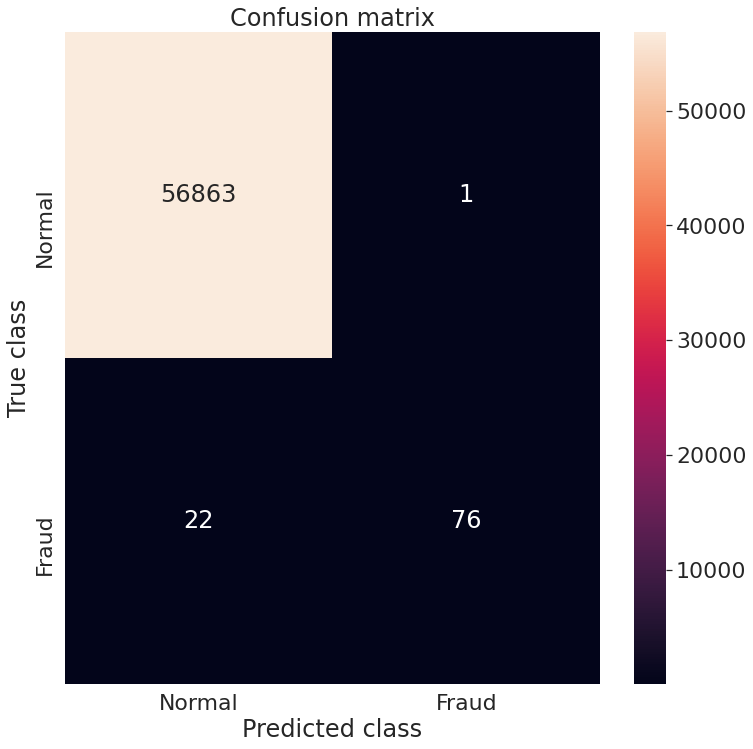

Random Forest: 23
0.9995962220427653
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.78      0.87        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



<Figure size 648x504 with 0 Axes>

In [ ]:

#Evaluating the classifier
#printing every score of the classifier
#scoring in any thing
 
n_outliers = len(Fraud)
n_errors = (y_pred2 != Y_test).sum()
print("The model used is Random Forest classifier")
acc= accuracy_score(Y_test,y_pred2)
print("The accuracy is  {}".format(acc))
prec= precision_score(Y_test,y_pred2)
print("The precision is {}".format(prec))
rec= recall_score(Y_test,y_pred2)
print("The recall is {}".format(rec))
f1= f1_score(Y_test,y_pred2)
print("The F1-Score is {}".format(f1))
MCC=matthews_corrcoef(Y_test,y_pred2)
print("The Matthews correlation coefficient is {}".format(MCC))
#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test, y_pred2)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
# Run classification metrics
plt.figure(figsize=(9, 7))
print('{}: {}'.format("Random Forest", n_errors))
print(accuracy_score(Y_test, y_pred2))
print(classification_report(Y_test, y_pred2))

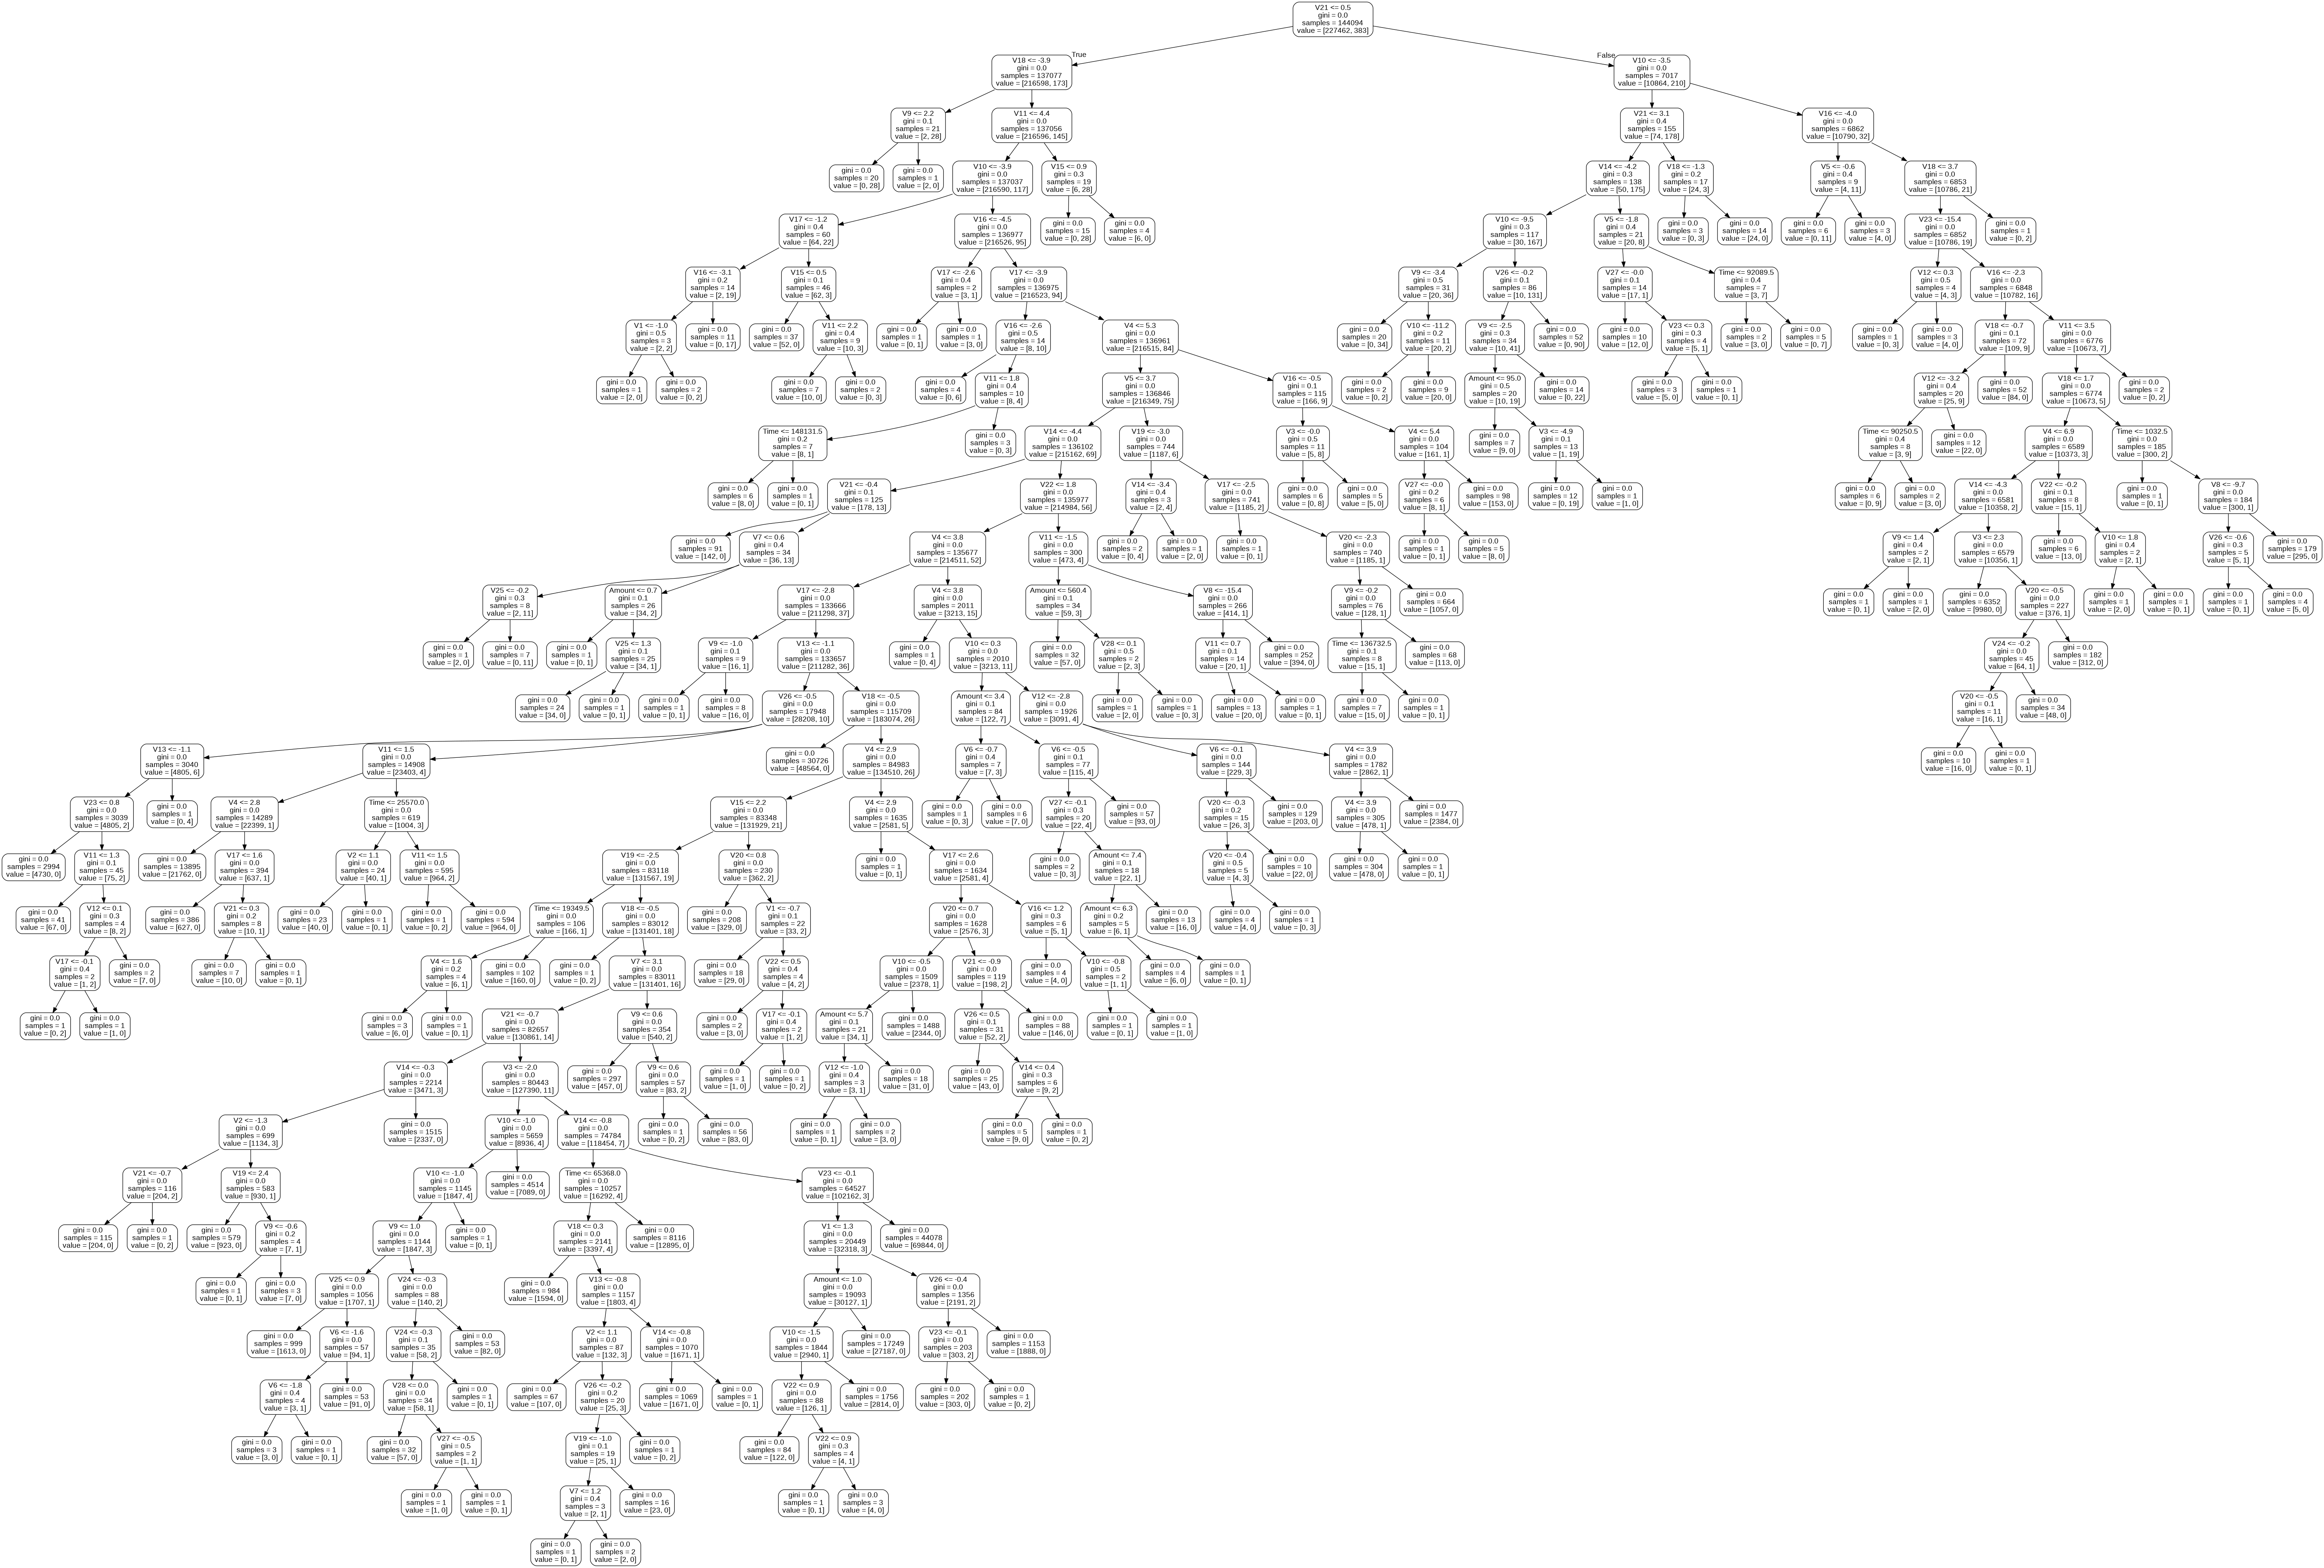

In [ ]:
#visualizing the random tree 
feature_list = list(X.columns)
# Import tools needed for visualization
#pulling out one tree from the forest
tree = rfc.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
display(Image(graph.create_png()))


Logistics Regression


In [ ]:

warnings.filterwarnings("ignore")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data.describe()

Time            V1  ...         Amount          Class
count  284807.000000  2.848070e+05  ...  284807.000000  284807.000000
mean    94813.859575  3.919560e-15  ...      88.349619       0.001727
std     47488.145955  1.958696e+00  ...     250.120109       0.041527
min         0.000000 -5.640751e+01  ...       0.000000       0.000000
25%     54201.500000 -9.203734e-01  ...       5.600000       0.000000
50%     84692.000000  1.810880e-02  ...      22.000000       0.000000
75%    139320.500000  1.315642e+00  ...      77.165000       0.000000
max    172792.000000  2.454930e+00  ...   25691.160000       1.000000

[8 rows x 31 columns]

In [ ]:
data.shape

(284807, 31)

In [ ]:
# percentage of missing values in each column
round(100 * (data.isnull().sum()/len(data)),2).sort_values(ascending=False)

Class     0.0
V14       0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V15       0.0
Amount    0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Time      0.0
dtype: float64

In [ ]:
# percentage of missing values in each row
round(100 * (data.isnull().sum(axis=1)/len(data)),2).sort_values(ascending=False)

284806    0.0
94937     0.0
94931     0.0
94932     0.0
94933     0.0
         ... 
189864    0.0
189863    0.0
189862    0.0
189861    0.0
0         0.0
Length: 284807, dtype: float64

In [ ]:
card_d=data.copy()
card_d.drop_duplicates(subset=None, inplace=True)

In [ ]:
data.shape

(284807, 31)

In [ ]:
card_d.shape

(283726, 31)

In [ ]:

## Assigning removed duplicate datase to original 
data=card_d
data.shape

(283726, 31)

In [ ]:
del card_d

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

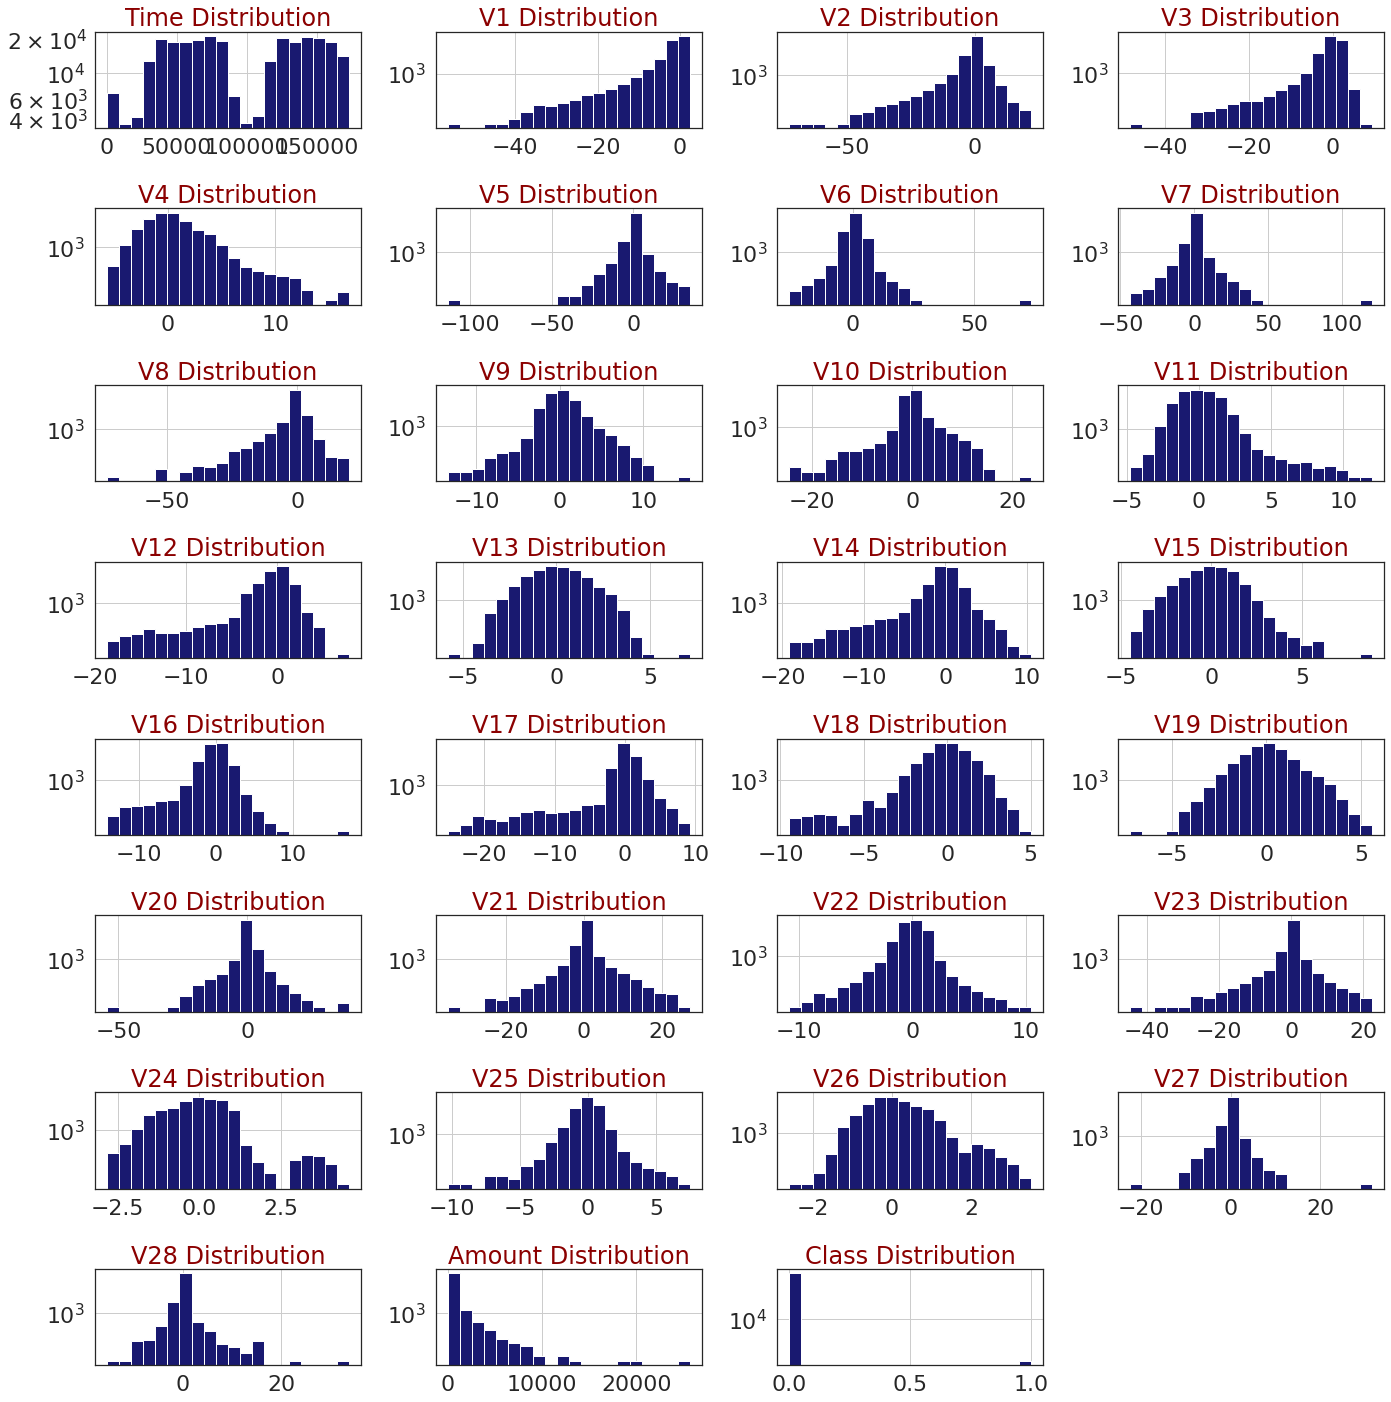

In [ ]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()
draw_histograms(data,data.columns,8,4)

In [ ]:
data.Class.value_counts()

0    283253
1       473
Name: Class, dtype: int64

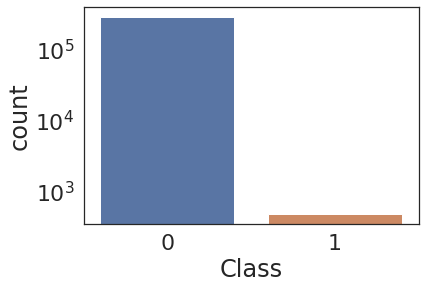

In [ ]:
ax=sns.countplot(x='Class',data=data);
ax.set_yscale('log')

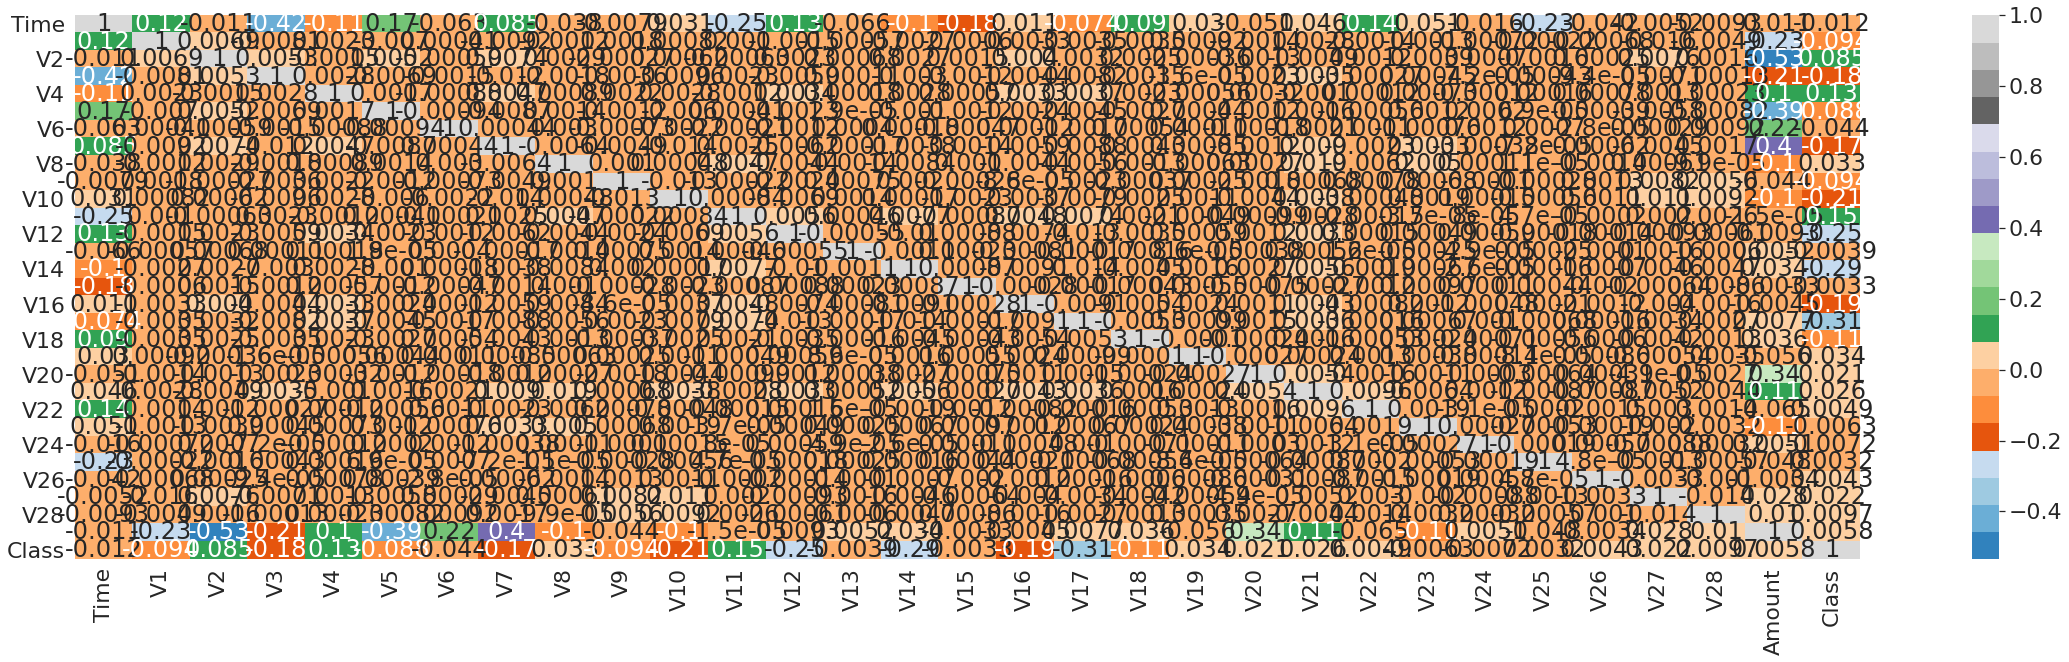

In [ ]:
plt.figure(figsize = (40,10))
sns.heatmap(data.corr(), annot = True, cmap="tab20c")
plt.show()

In [ ]:
data.shape

(283726, 31)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

In [ ]:
estimators=['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
#x = pd.DataFrame(df.iloc[:,:-1])
#y = pd.DataFrame(df.iloc[:,-1])

X1 = data[estimators]
y = data['Class']

In [ ]:

col=X1.columns[:-1]
col

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

In [ ]:
X = sm.add_constant(X1)
reg_logit = sm.Logit(y,X)
results_logit = reg_logit.fit()

Optimization terminated successfully.
         Current function value: 0.003922
         Iterations 13


In [ ]:
results_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:               283726
Model:                          Logit   Df Residuals:                   283695
Method:                           MLE   Df Model:                           30
Date:                Sat, 13 Mar 2021   Pseudo R-squ.:                  0.6819
Time:                        06:54:38   Log-Likelihood:                -1112.8
converged:                       True   LL-Null:                       -3498.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.3983      0.250    -33.602      0.000      -8.888      -7.908
Time       -3.676e-06   2.26e-06     -1.627      0.104    -8.1e-06    7.51e-07
V1             0.0961      0.042      2.270      0.023       0.013       0.179
V2             0.0106      0.058      0.182      0.855      -0.103       0.125
V3            -0.0083      0.053     -0.157      0.875      -0.112       0.096
V4             0.7013      0.074      9.484      0.000       0.556       0.846
V5             0.1305      0.067      1.952      0.051      -0.001       0.262
V6            -0.1240      0.074     -1.671      0.095      -0.269       0.021
V7            -0.0948      0.067     -1.421      0.155      -0.226       0.036
V8            -0.1766      0.031     -5.769      0.000      -0.237      -0.117
V9            -0.2825      0.111     -2.551      0.011      -0.500      -0.065
V10           -0.8230      0.097     -8.497      0.000      -1.013      -0.633
V11           -0.0579      0.081     -0.711      0.477      -0.217       0.102
V12            0.0831      0.087      0.955      0.339      -0.087       0.254
V13           -0.3257      0.082     -3.986      0.000      -0.486      -0.166
V14           -0.5477      0.062     -8.785      0.000      -0.670      -0.426
V15           -0.1207      0.086     -1.403      0.161      -0.289       0.048
V16           -0.1992      0.125     -1.592      0.111      -0.444       0.046
V17           -0.0139      0.070     -0.198      0.843      -0.151       0.124
V18           -0.0139      0.129     -0.107      0.914      -0.267       0.239
V19            0.0985      0.097      1.015      0.310      -0.092       0.289
V20           -0.4616      0.082     -5.660      0.000      -0.621      -0.302
V21            0.3944      0.060      6.564      0.000       0.277       0.512
V22            0.6377      0.134      4.750      0.000       0.375       0.901
V23           -0.1021      0.059     -1.733      0.083      -0.217       0.013
V24            0.1191      0.148      0.807      0.420      -0.170       0.409
V25           -0.0506      0.133     -0.379      0.704      -0.312       0.211
V26            0.0094      0.190      0.050      0.960      -0.363       0.382
V27           -0.8265      0.122     -6.778      0.000      -1.065      -0.587
V28           -0.2973      0.088     -3.378      0.001      -0.470      -0.125
Amount         0.0009      0.000      2.454      0.014       0.000       0.002
==============================================================================

Possibly complete quasi-separation: A fraction 0.32 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:

def back_feature_elem (data_frame,dep_var,col_list):
    """ Takes in the dataframe, the dependent variable and a list of column names, runs the regression repeatedly eleminating feature with the highest
    P-value above alpha one at a time and returns the regression summary with all p-values below alpha"""

    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.0001):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

result=back_feature_elem(X,data.Class,col)

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:               283726
Model:                          Logit   Df Residuals:                   283701
Method:                           MLE   Df Model:                           24
Date:                Sat, 13 Mar 2021   Pseudo R-squ.:                 0.03183
Time:                        06:54:57   Log-Likelihood:                -3386.9
converged:                       True   LL-Null:                       -3498.2
Covariance Type:            nonrobust   LLR p-value:                 3.947e-34
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Time          -0.0001   1.43e-06    -85.924      0.000      -0.000      -0.000
V1             0.8891      0.028     31.770      0.000       0.834       0.944
V2            -0.4504      0.023    -19.221      0.000      -0.496      -0.405
V3            -1.6025      0.032    -49.412      0.000      -1.666      -1.539
V4             0.1457      0.026      5.709      0.000       0.096       0.196
V5             0.4091      0.024     17.030      0.000       0.362       0.456
V6            -0.3883      0.025    -15.228      0.000      -0.438      -0.338
V7             0.0986      0.028      3.529      0.000       0.044       0.153
V8            -0.3896      0.023    -17.071      0.000      -0.434      -0.345
V9            -0.4603      0.043    -10.647      0.000      -0.545      -0.376
V10           -0.3865      0.051     -7.513      0.000      -0.487      -0.286
V11           -0.6094      0.034    -17.849      0.000      -0.676      -0.542
V12            0.1223      0.034      3.563      0.000       0.055       0.190
V13           -0.4500      0.035    -13.042      0.000      -0.518      -0.382
V14           -0.6893      0.032    -21.761      0.000      -0.751      -0.627
V15           -1.0460      0.041    -25.257      0.000      -1.127      -0.965
V16           -0.2471      0.042     -5.925      0.000      -0.329      -0.165
V17           -0.7008      0.033    -21.372      0.000      -0.765      -0.637
V20           -0.6800      0.050    -13.632      0.000      -0.778      -0.582
V21            0.5744      0.041     13.900      0.000       0.493       0.655
V22            1.3583      0.062     21.848      0.000       1.236       1.480
V23            0.2907      0.055      5.294      0.000       0.183       0.398
V25           -1.9920      0.073    -27.453      0.000      -2.134      -1.850
V26            0.3016      0.072      4.194      0.000       0.161       0.443
V27           -0.7760      0.090     -8.607      0.000      -0.953      -0.599
==============================================================================

Possibly complete quasi-separation: A fraction 0.68 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

      CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
Time      0.999874       0.999880    0.999877     0.0
V1        2.302981       2.569980    2.432820     0.0
V2        0.608731       0.667302    0.637344     0.0
V3        0.188994       0.214614    0.201397     0.0
V4        1.100385       1.216133    1.156812     0.0
V5        1.436263       1.578095    1.505510     0.0
V6        0.645176       0.712990    0.678236     0.0
V7        1.044815       1.165779    1.103641     0.0
V8        0.647697       0.708313    0.677327     0.0
V9        0.579802       0.686889    0.631078     0.0
V10       0.614250       0.751502    0.679419     0.0
V11       0.508500       0.581317    0.543691     0.0
V12       1.056575       1.208747    1.130103     0.0
V13       0.595904       0.682214    0.637600     0.0
V14       0.471735       0.534095    0.501947     0.0
V15       0.323961       0.381060    0.351353     0.0
V16       0.719768       0.847593    0.781070     0.0
V17       0.465302       0.5

In [ ]:
new_features=data[['Time','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V20','V21', 'V22', 'V23', 'V25', 'V26', 'V27','Class']]
x=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,stratify=y)

In [ ]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred5=logreg.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.70      0.70      0.70       142

    accuracy                           1.00     85118
   macro avg       0.85      0.85      0.85     85118
weighted avg       1.00      1.00      1.00     85118



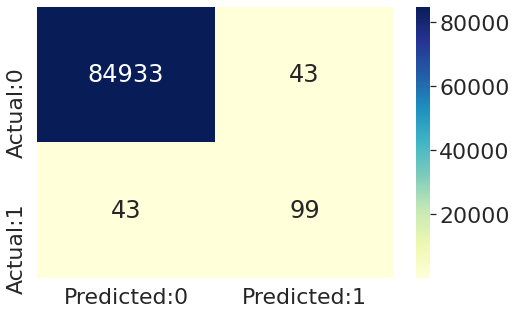

In [ ]:
cm=confusion_matrix(y_test,y_pred5)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [ ]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [ ]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =       ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy =                  ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) =       ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) =       ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) =               ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) =               ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =        0.9989896379144246 
 The Missclassification = 1-Accuracy =                   0.001010362085575367 
 Sensitivity or True Positive Rate = TP/(TP+FN) =        0.6971830985915493 
 Specificity or True Negative Rate = TN/(TN+FP) =        0.9994939747693466 
 Positive Predictive value = TP/(TP+FP) =                0.6971830985915493 
 Negative predictive Value = TN/(TN+FN) =                0.9994939747693466 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  1377.7635113003878 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.30297021197984897


In [ ]:
y_pred_prob=logreg.predict_proba(x_test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of Not Fraud (0)','Prob of Fraud (1)'])
y_pred_prob_df.head()

Prob of Not Fraud (0)  Prob of Fraud (1)
0               0.999978       2.151467e-05
1               0.999963       3.680012e-05
2               0.999584       4.155100e-04
3               1.000000       2.106495e-10
4               0.999973       2.710717e-05

In [ ]:
for i in range(0,11):
    cm2=0
    y_pred_prob_yes=logreg.predict_proba(x_test)
    y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
    cm2=confusion_matrix(y_test,y_pred5)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')

With 0.0 threshold the Confusion Matrix is  
 [[84933    43]
 [   43    99]] 
 with 85032 correct predictions and 43 Type II errors( False Negatives) 

 Sensitivity:  0.6971830985915493 Specificity:  0.9994939747693466 



With 0.1 threshold the Confusion Matrix is  
 [[84933    43]
 [   43    99]] 
 with 85032 correct predictions and 43 Type II errors( False Negatives) 

 Sensitivity:  0.6971830985915493 Specificity:  0.9994939747693466 



With 0.2 threshold the Confusion Matrix is  
 [[84933    43]
 [   43    99]] 
 with 85032 correct predictions and 43 Type II errors( False Negatives) 

 Sensitivity:  0.6971830985915493 Specificity:  0.9994939747693466 



With 0.3 threshold the Confusion Matrix is  
 [[84933    43]
 [   43    99]] 
 with 85032 correct predictions and 43 Type II errors( False Negatives) 

 Sensitivity:  0.6971830985915493 Specificity:  0.9994939747693466 



With 0.4 threshold the Confusion Matrix is  
 [[84933    43]
 [   43    99]] 
 with 85032 correct prediction

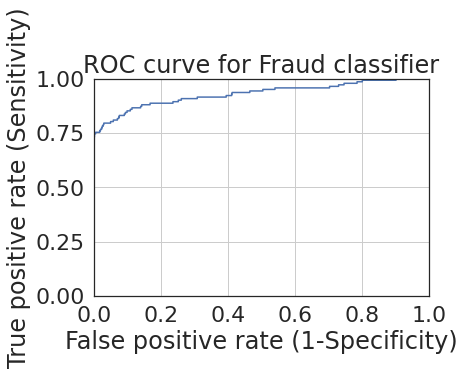

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Fraud classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [ ]:
roc_auc_score(y_test,y_pred_prob_yes[:,1])

0.9303096930765538

Naive Bayes


Class as pie chart:


Text(0, 0.5, '')

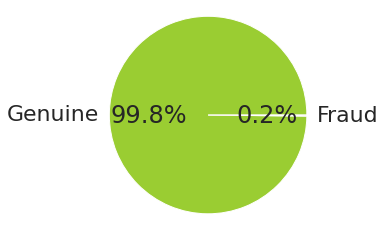

In [ ]:
# Check Class variables that has 0 value for Genuine transactions and 1 for Fraud
print("Class as pie chart:")
fig, ax = plt.subplots(1, 1)
ax.pie(df.Class.value_counts(),autopct='%1.1f%%', labels=['Genuine','Fraud'], colors=['yellowgreen','r'])
plt.axis('equal')
plt.ylabel('')

Time variable
284802    47.996111
284803    47.996389
284804    47.996667
284805    47.996667
284806    47.997778
Name: Time_Hr, dtype: float64


Text(0, 0.5, '# transactions')

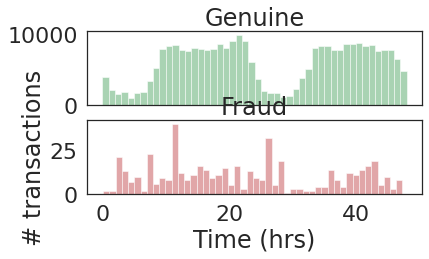

In [ ]:

#plot Time to see if there is any trend
print("Time variable")
df["Time_Hr"] = df["Time"]/3600 # convert to hours
print(df["Time_Hr"].tail(5))
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(6,3))
ax1.hist(df.Time_Hr[df.Class==0],bins=48,color='g',alpha=0.5)
ax1.set_title('Genuine')
ax2.hist(df.Time_Hr[df.Class==1],bins=48,color='r',alpha=0.5)
ax2.set_title('Fraud')
plt.xlabel('Time (hrs)')
plt.ylabel('# transactions')

In [ ]:
df = df.drop(['Time'],axis=1)

Text(0, 0.5, '# transactions')

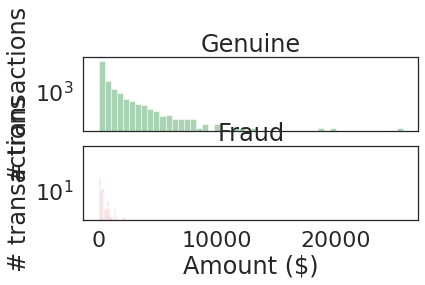

In [ ]:
fig, (ax3,ax4) = plt.subplots(2,1, figsize = (6,3), sharex = True)
ax3.hist(df.Amount[df.Class==0],bins=50,color='g',alpha=0.5)
ax3.set_yscale('log') # to see the tails
ax3.set_title('Genuine') # to see the tails
ax3.set_ylabel('# transactions')
ax4.hist(df.Amount[df.Class==1],bins=50,color='r',alpha=0.5)
ax4.set_yscale('log') # to see the tails
ax4.set_title('Fraud') # to see the tails
ax4.set_xlabel('Amount ($)')
ax4.set_ylabel('# transactions')

In [ ]:


df['scaled_Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df = df.drop(['Amount'],axis=1)

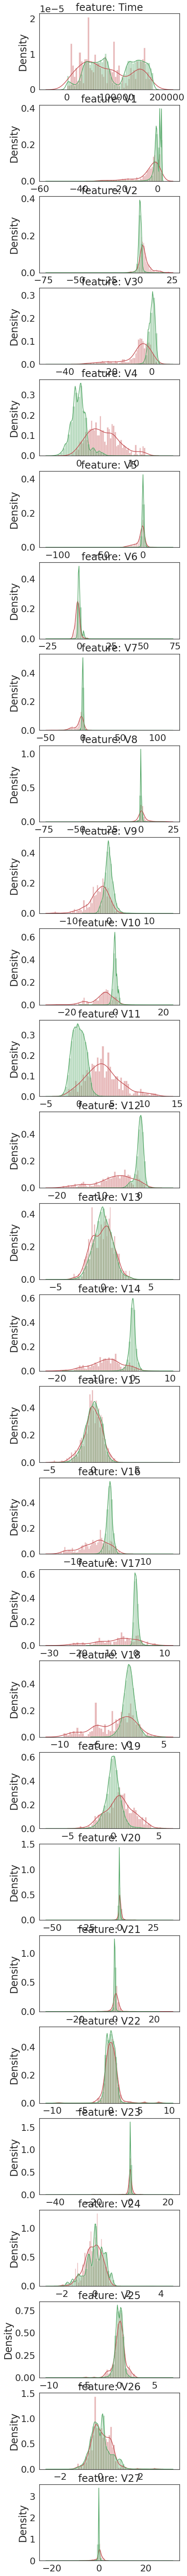

In [ ]:
#let us check correlations and shapes of those 25 principal components.
# Features V1, V2, ... V28 are the principal components obtained with PCA.

gs = gridspec.GridSpec(28, 1)
plt.figure(figsize=(6,28*4))
for i, col in enumerate(data[data.iloc[:,0:28].columns]):
    ax5 = plt.subplot(gs[i])
    sns.distplot(data[col][data.Class == 1], bins=50, color='r')
    sns.distplot(data[col][data.Class == 0], bins=50, color='g')
    ax5.set_xlabel('')
    ax5.set_title('feature: ' + str(col))
plt.show()


In [ ]:

def split_data(df, drop_list):
    df = df.drop(drop_list,axis=1)
    print(df.columns)
    #test train split time
    from sklearn.model_selection import train_test_split
    y = df['Class'].values #target
    X = df.drop(['Class'],axis=1).values #features
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)

    print("train-set size: ", len(y_train),
      "\ntest-set size: ", len(y_test))
    print("fraud cases in test-set: ", sum(y_test))
    return X_train, X_test, y_train, y_test

In [ ]:
def get_predictions(clf, X_train, y_train, X_test):
    # create classifier
    clf = clf
    # fit it to training data
    clf.fit(X_train,y_train)
    # predict using test data
    y_pred3 = clf.predict(X_test)
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob1 = clf.predict_proba(X_test)
    #for fun: train-set predictions
    train_pred = clf.predict(X_train)
    print('train-set confusion matrix:\n', confusion_matrix(y_train,train_pred)) 
    return y_pred3, y_pred_prob1

In [ ]:

def print_scores(y_test,y_pred3,y_pred_prob1):
    print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred3)) 
    print("recall score: ", recall_score(y_test,y_pred3))
    print("precision score: ", precision_score(y_test,y_pred3))
    print("f1 score: ", f1_score(y_test,y_pred3))
    print("accuracy score: ", accuracy_score(y_test,y_pred3))
    print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob1[:,1])))

In [ ]:
drop_list = []
X_train, X_test, y_train, y_test = split_data(df, drop_list)
y_pred3, y_pred_prob1 = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test,y_pred3,y_pred_prob1)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class', 'Time_Hr',
       'scaled_Amount'],
      dtype='object')
train-set size:  227845 
test-set size:  56962
fraud cases in test-set:  98
train-set confusion matrix:
 [[222480   4971]
 [    69    325]]
test-set confusion matrix:
 [[55535  1329]
 [   15    83]]
recall score:  0.8469387755102041
precision score:  0.058781869688385266
f1 score:  0.10993377483443707
accuracy score:  0.9764053228468101
ROC AUC: 0.963247971529636


In [ ]:
drop_list = ['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
X_train, X_test, y_train, y_test = split_data(df, drop_list)
y_pred3, y_pred_prob1 = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test,y_pred3,y_pred_prob1)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class', 'Time_Hr',
       'scaled_Amount'],
      dtype='object')
train-set size:  227845 
test-set size:  56962
fraud cases in test-set:  98
train-set confusion matrix:
 [[223967   3484]
 [    61    333]]
test-set confusion matrix:
 [[55935   929]
 [   12    86]]
recall score:  0.8775510204081632
precision score:  0.08472906403940887
f1 score:  0.15453728661275834
accuracy score:  0.9834802148800955
ROC AUC: 0.9622034097825962


In [ ]:
drop_list = ['Time_Hr','V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
X_train, X_test, y_train, y_test = split_data(df, drop_list)
y_pred3, y_pred_prob1 = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test,y_pred3,y_pred_prob1)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class', 'scaled_Amount'],
      dtype='object')
train-set size:  227845 
test-set size:  56962
fraud cases in test-set:  98
train-set confusion matrix:
 [[223964   3487]
 [    60    334]]
test-set confusion matrix:
 [[55936   928]
 [   12    86]]
recall score:  0.8775510204081632
precision score:  0.08481262327416174
f1 score:  0.15467625899280577
accuracy score:  0.9834977704434535
ROC AUC: 0.9613612643988377


In [ ]:
# Case-NB-4 : drop some of principle components + Time + 'scaled_Amount'
drop_list = ['scaled_Amount','Time_Hr','V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
X_train, X_test, y_train, y_test = split_data(df, drop_list)
y_pred3, y_pred_prob1 = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test,y_pred3,y_pred_prob1)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class'],
      dtype='object')
train-set size:  227845 
test-set size:  56962
fraud cases in test-set:  98
train-set confusion matrix:
 [[224025   3426]
 [    60    334]]
test-set confusion matrix:
 [[55954   910]
 [   12    86]]
recall score:  0.8775510204081632
precision score:  0.08634538152610442
f1 score:  0.15722120658135283
accuracy score:  0.9838137705838981
ROC AUC: 0.9611556179872063


In [ ]:






df = df.drop(drop_list,axis=1)
print(df.columns)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class'],
      dtype='object')


In [ ]:
y_pred3, y_pred_prob1 = get_predictions(LogisticRegression(C = 0.01, penalty = 'l2')
                                      , X_train, y_train, X_test)
print_scores(y_test,y_pred3,y_pred_prob1)

train-set confusion matrix:
 [[227427     24]
 [   153    241]]
test-set confusion matrix:
 [[56851    13]
 [   39    59]]
recall score:  0.6020408163265306
precision score:  0.8194444444444444
f1 score:  0.6941176470588234
accuracy score:  0.9990871107053826
ROC AUC: 0.9725212608960297


In [ ]:
# get indices for fraud and genuine classes 
fraud_ind = np.array(df[df.Class == 1].index)
gen_ind = df[df.Class == 0].index
n_fraud = len(df[df.Class == 1])
# random selection from genuine class
random_gen_ind = np.random.choice(gen_ind, n_fraud, replace = False)
random_gen_ind = np.array(random_gen_ind)
# merge two class indices: random genuine + original fraud
under_sample_ind = np.concatenate([fraud_ind,random_gen_ind])
# Under sample dataset
undersample_df = df.iloc[under_sample_ind,:]
y_undersample  = undersample_df['Class'].values #target
X_undersample = undersample_df.drop(['Class'],axis=1).values #features

print("# transactions in undersampled data: ", len(undersample_df))
print("% genuine transactions: ",len(undersample_df[undersample_df.Class == 0])/len(undersample_df))
print("% fraud transactions: ", sum(y_undersample)/len(undersample_df))

# transactions in undersampled data:  984
% genuine transactions:  0.5
% fraud transactions:  0.5


In [ ]:
# let us train logistic regression with undersamples data
# Case-LR-2
# split undersampled data into 80/20 train-test datasets. 
# - Train model from this 80% fraction of undersampled data, get predictions from left over i.e. 20%.
drop_list = []
X_und_train, X_und_test, y_und_train, y_und_test = split_data(undersample_df, drop_list)
y_und_pred, y_und_pred_prob = get_predictions(LogisticRegression(C = 0.01, penalty = 'l2'), X_und_train, y_und_train, X_und_test)
print_scores(y_und_test,y_und_pred,y_und_pred_prob)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class'],
      dtype='object')
train-set size:  787 
test-set size:  197
fraud cases in test-set:  98
train-set confusion matrix:
 [[388   5]
 [ 50 344]]
test-set confusion matrix:
 [[99  0]
 [ 6 92]]
recall score:  0.9387755102040817
precision score:  1.0
f1 score:  0.968421052631579
accuracy score:  0.9695431472081218
ROC AUC: 0.9871160585446299


In [ ]:
# Case-LR-3
# "train" with undersamples, "test" with full data
# call classifier
lr = LogisticRegression(C = 0.01, penalty = 'l2')
# fit it to complete undersampled data
lr.fit(X_undersample, y_undersample)
# predict on full data
y_full = df['Class'].values #target
X_full = df.drop(['Class'],axis=1).values #features
y_full_pred = lr.predict(X_full)
# Compute predicted probabilities: y_pred_prob
y_full_pred_prob = lr.predict_proba(X_full)
print("scores for Full set")   
print('test-set confusion matrix:\n', confusion_matrix(y_full,y_full_pred)) 
print("recall score: ", recall_score(y_full,y_full_pred))
print("precision score: ", precision_score(y_full,y_full_pred))

scores for Full set
test-set confusion matrix:
 [[280848   3467]
 [    55    437]]
recall score:  0.8882113821138211
precision score:  0.11193647540983606


In [ ]:
y_p20_pred = lr.predict(X_test)
y_p20_pred_prob = lr.predict_proba(X_test)
print("scores for test (20% of full) set")   
print('test-set confusion matrix:\n', confusion_matrix(y_test,y_p20_pred)) 
print("recall score: ", recall_score(y_test,y_p20_pred))
print("precision score: ", precision_score(y_test,y_p20_pred))

scores for test (20% of full) set
test-set confusion matrix:
 [[56143   721]
 [    9    89]]
recall score:  0.9081632653061225
precision score:  0.10987654320987654


ENSEMBLE

In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
final_pred = (y_p20_pred+y_pred3+y_pred1+y_pred+prediction_SVM_all1)/5
#print("Accurancy",accuracy_score(y_test,final_pred))

